[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/boostcourse-ds-510/blob/master/open-data-analysis-input.ipynb)


# 공공데이터 상권정보 분석해 보기
* https://www.data.go.kr/dataset/15012005/fileData.do
* 국가중점데이터인 상권정보를 살펴봅니다.
* 처음으로 파일데이터에서 `상가(상권)정보_의료기관_201909`를 다운로드 받아봅니다.

## 필요한 라이브러리 불러오기

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
# import matplotlib.pyplot as plt

## 시각화를 위한 폰트 설정

In [ ]:
# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# !pip install koreanize-matplotlib

# import koreanize_matplotlib

In [57]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
# Window 의 한글 폰트 설정
# plt.rc('font',family='Malgun Gothic')
plt.rc('font', family="D2Coding")
# Mac 의 한글 폰트 설정
# plt.rc('font', family='AppleGothic') 
plt.rc('axes', unicode_minus=False)

# plt.style.use("seaborn-v0_8")

# 폰트가 선명하게 보이기 위해 - 그래프에 retina display 적용
# retina 대신 svg 등의 설정을 할 수도 있으며 
# 디스플레이(모니터)가 retina 를 지원해야만 선명한 차이를 볼 수 있습니다.
%config InlineBackend.figure_format = 'retina'

# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

## 데이터 로드하기
* 판다스에서 데이터를 로드할 때는 read_csv를 사용합니다.
* 데이터를 로드해서 df라는 변수에 담습니다.
* 그리고 shape 를 통해 데이터의 갯수를 찍습니다. 결과는 (행, 열) 순으로 출력됩니다.

In [5]:
from glob import glob

file_name = glob("./data/store/*_*_*_*.csv")[1]
file_name

'./data/store\\소상공인시장진흥공단_상가업소정보_의료기관_201909.csv'

In [6]:
df = pd.read_csv(file_name, low_memory=False)
df.shape

(91335, 39)

## 데이터 미리보기
* head, tail 을 통해 데이터를 미리 볼 수 있습니다.

In [7]:
# head 로 데이터를 미리보기 합니다.
df.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344


In [8]:
# tail 로 마지막 부분에 있는 데이터를 불러옵니다.
df.tail(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
91334,16109073,천안김안과천안역본점의원,NaN,S,의료,S01,병원,S01B13,안과의원,Q86201,...,4413110700102660017016314,김안과,충청남도 천안시 동남구 중앙로 92,330952.0,31127.0,NaN,NaN,NaN,127.152651,36.80664


In [9]:
# sample 로 미리보기를 합니다.
df.sample()


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
54540,21507697,전주김약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4511111100102600006000001,김약국,전라북도 전주시 완산구 팔달로 101,560040.0,55043.0,NaN,NaN,NaN,127.149198,35.811592


## 데이터 요약하기

### 요약정보

In [10]:
# info로 데이터의 요약을 봅니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  int64  
 20  대지구분코드

### 컬럼명 보기

In [12]:
# 컬럼명만 출력해 봅니다.
df.columns


Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

### 데이터 타입

In [13]:
# 데이터 타입만 출력합니다.
df.dtypes


상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드         float64
시도명           object
시군구코드        float64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드        float64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호        float64
신우편번호        float64
동정보           object
층정보           object
호정보           object
경도           float64
위도           float64
dtype: object

## 결측치

In [14]:
df.isnull().sum()

상가업소번호           0
상호명              0
지점명          89989
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드      4922
표준산업분류명       4922
시도코드           379
시도명            379
시군구코드          379
시군구명           379
행정동코드            0
행정동명           379
법정동코드           55
법정동명            55
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지            0
지번부번지        19256
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        80731
건물관리번호           0
건물명          44882
도로명주소            0
구우편번호           12
신우편번호            2
동정보          83929
층정보          47291
호정보          75784
경도               0
위도               0
dtype: int64

<Axes: >

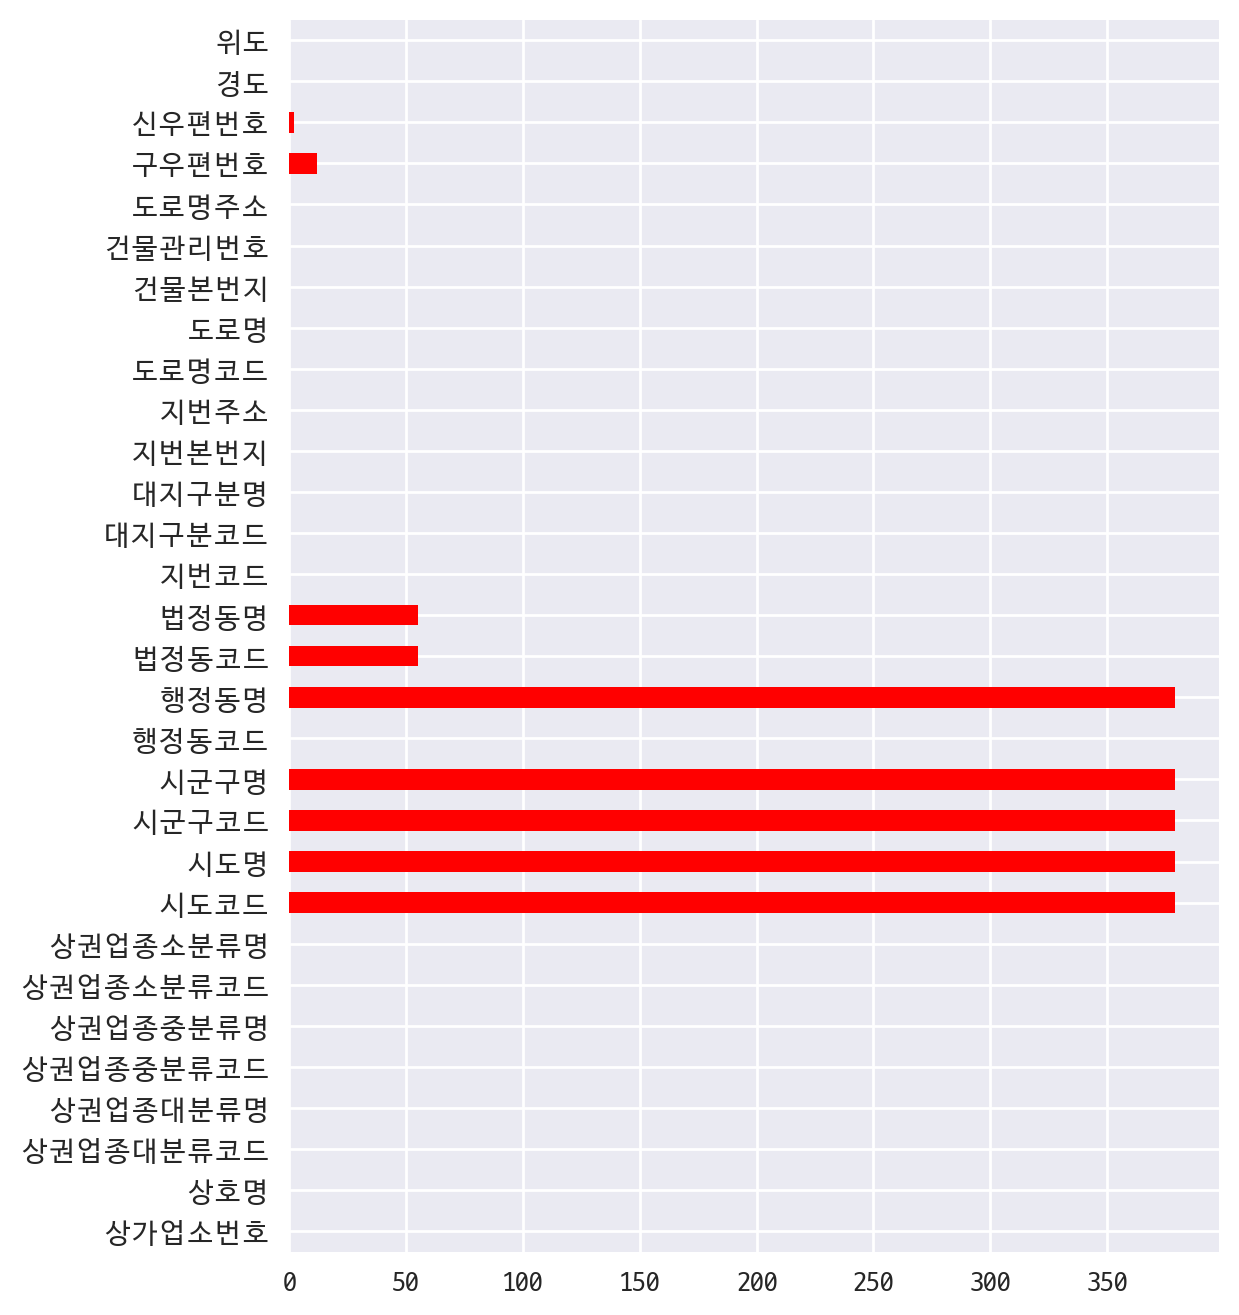

In [58]:
# 위에서 구한 결측치를 .plot.bar 를 통해 막대그래프로 표현합니다. 
df.isnull().sum().plot.barh(figsize=(6, 8), color="red")


In [16]:
# 위에서 계산한 결측치 수를 reset_index 를 통해 데이터프레임으로 만들어 줍니다.
# df_null_count 변수에 결과를 담아서 head 로 미리보기를 합니다.
df_null_count = df.isnull().sum().reset_index()
df_null_count.head()

,index,0
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


## 컬럼명 변경하기

In [17]:
# df_null_count 변수에 담겨있는 컬럼의 이름을 "컬럼명", "결측치수"로 변경해 줍니다.
df_null_count.columns = ["컬럼명", "결측치수"]
# df_null_count.rename({"index": "컬럼명", 0: "결측치수"}, axis=1, inplace=True)
df_null_count


,컬럼명,결측치수
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0
5,상권업종중분류코드,0
6,상권업종중분류명,0
7,상권업종소분류코드,0
8,상권업종소분류명,0
9,표준산업분류코드,4922


## 정렬하기

In [18]:
df_null_count[df_null_count["결측치수"] > 0].sort_values("결측치수", ascending=False)

,컬럼명,결측치수
2,지점명,89989
34,동정보,83929
28,건물부번지,80731
36,호정보,75784
35,층정보,47291
30,건물명,44882
23,지번부번지,19256
9,표준산업분류코드,4922
10,표준산업분류명,4922
12,시도명,379


In [19]:
# df_null_count 데이터프레임에 있는 결측치수 컬럼을 sort_values 를 통해 정렬해서
# 결측치가 많은 순으로 상위 10개만 출력합니다.
df_null_head = df_null_count[df_null_count["결측치수"] > 0].sort_values("결측치수", ascending=False).head(9)
df_null_head


,컬럼명,결측치수
2,지점명,89989
34,동정보,83929
28,건물부번지,80731
36,호정보,75784
35,층정보,47291
30,건물명,44882
23,지번부번지,19256
9,표준산업분류코드,4922
10,표준산업분류명,4922


## 특정 컬럼만 불러오기

In [20]:
# 지점명 컬럼을 불러옵니다.
df["지점명"].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    수지점
Name: 지점명, dtype: object

In [21]:
# "컬럼명" 이라는 컬럼의 값만 가져와서 drop_columns 라는 변수에 담습니다.
drop_columns = df_null_head["컬럼명"].values
drop_columns

array(['지점명', '동정보', '건물부번지', '호정보', '층정보', '건물명', '지번부번지', '표준산업분류코드',
       '표준산업분류명'], dtype=object)

In [22]:
# drop_columns 변수로 해당 컬럼 정보만 데이터프레임에서 가져옵니다.
df[drop_columns].head()

,지점명,동정보,건물부번지,호정보,층정보,건물명,지번부번지,표준산업분류코드,표준산업분류명
0,NaN,NaN,NaN,NaN,NaN,산호한양아파트,NaN,Q86201,일반 의원
1,NaN,NaN,NaN,NaN,4,NaN,14.0,Q86201,일반 의원
2,NaN,NaN,NaN,NaN,NaN,한라프라자,1.0,Q86201,일반 의원
3,NaN,NaN,NaN,NaN,5,NaN,1.0,NaN,NaN
4,수지점,NaN,NaN,NaN,1,NaN,2.0,G47811,의약품 및 의료용품 소매업


## 제거하기

In [23]:
df.drop(drop_columns, axis=1, inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   상권업종대분류코드  91335 non-null  object 
 3   상권업종대분류명   91335 non-null  object 
 4   상권업종중분류코드  91335 non-null  object 
 5   상권업종중분류명   91335 non-null  object 
 6   상권업종소분류코드  91335 non-null  object 
 7   상권업종소분류명   91335 non-null  object 
 8   시도코드       90956 non-null  float64
 9   시도명        90956 non-null  object 
 10  시군구코드      90956 non-null  float64
 11  시군구명       90956 non-null  object 
 12  행정동코드      91335 non-null  int64  
 13  행정동명       90956 non-null  object 
 14  법정동코드      91280 non-null  float64
 15  법정동명       91280 non-null  object 
 16  지번코드       91335 non-null  int64  
 17  대지구분코드     91335 non-null  int64  
 18  대지구분명      91335 non-null  object 
 19  지번본번지      91335 non-null  int64  
 20  지번주소  

In [25]:
df.head()

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
0,19956873,하나산부인과,S,의료,S01,병원,S01B10,산부인과,41.0,경기도,...,경기도 안산시 단원구 선부동 1081,412733191011,경기도 안산시 단원구 달미로,10,4127310900110810000010857,경기도 안산시 단원구 달미로 10,425764.0,15236.0,126.814295,37.336344
1,20024149,타워광명내과의원,S,의료,S01,병원,S01B07,내과/외과,11.0,서울특별시,...,서울특별시 강남구 도곡동 467-14,116804166604,서울특별시 강남구 언주로30길,39,1168011800104670014000001,서울특별시 강남구 언주로30길 39,135270.0,6292.0,127.053198,37.488742
2,20152277,조정현신경외과의원,S,의료,S01,병원,S01B15,신경외과,41.0,경기도,...,경기도 시흥시 정왕동 1740-1,413903199049,경기도 시흥시 중심상가로,178,4139013200117400001017064,경기도 시흥시 중심상가로 178,429450.0,15066.0,126.734841,37.344955
3,20350610,한귀원정신과의원,S,의료,S01,병원,S01B99,기타병원,26.0,부산광역시,...,부산광역시 수영구 광안동 74-1,265003131037,부산광역시 수영구 수영로,688,2650010400100740001009932,부산광역시 수영구 수영로 688,613100.0,48266.0,129.115438,35.166872
4,20364049,더블유스토어수지점,S,의료,S02,약국/한약방,S02A01,약국,41.0,경기도,...,경기도 용인시 수지구 풍덕천동 712-2,414653205024,경기도 용인시 수지구 문정로,32,4146510100107120002026238,경기도 용인시 수지구 문정로 32,448170.0,16837.0,127.095522,37.323528


## 기초 통계값 보기

### 기초 통계 수치

In [26]:
# 평균값
df["위도"].mean()


36.62471119236685

In [27]:
# 중앙값
df["위도"].median()

37.2346523177033

In [28]:
# 최댓값
df["위도"].max()

38.4996585705598

In [29]:
# 최솟값
df["위도"].min()

33.2192896688307

In [30]:
# 개수
df["위도"].count()

91335

### 기초통계값 요약하기 - describe

describe 를 사용하면 데이터를 요약해 볼 수 있습니다.
기본적으로 수치형 데이터를 요약해서 보여줍니다.
데이터의 갯수, 평균, 표준편차, 최솟값, 
1사분위수(25%), 2사분위수(50%), 3사분위수(75%), 최댓값을 볼 수 있습니다.

In [31]:
# 위도를 describe로 요약해 봅니다.
df["위도"].describe()


count    91335.000000
mean        36.624711
std          1.041361
min         33.219290
25%         35.811830
50%         37.234652
75%         37.507463
max         38.499659
Name: 위도, dtype: float64

In [32]:
# 2개의 컬럼을 describe 로 요약합니다.
df[["위도", "경도"]].describe()

,위도,경도
count,91335.000000,91335.000000
mean,36.624711,127.487524
std,1.041361,0.842877
min,33.219290,124.717632
25%,35.811830,126.914297
50%,37.234652,127.084550
75%,37.507463,128.108919
max,38.499659,130.909912


In [33]:
# describe로 문자열 데이터타입의 요약을 봅니다.
df.describe(include=object)

,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,건물관리번호,도로명주소
count,91335,91335,91335,91335,91335,91335,91335,90956,90956,90956,91280,91335,91335,91335,91335,91335
unique,56910,1,1,5,5,34,34,17,228,2791,2822,2,53118,16610,54142,54031
top,리원,S,의료,S01,병원,S02A01,약국,경기도,서구,중앙동,중동,대지,서울특별시 동대문구 제기동 965-1,서울특별시 강남구 강남대로,1123010300109650001031604,서울특별시 동대문구 약령중앙로8길 10
freq,152,91335,91335,60774,60774,18964,18964,21374,3165,1856,874,91213,198,326,198,198


### 중복제거한 값 보기
* unique 로 중복을 제거한 값을 보고 nunique 로 갯수를 세어봅니다.

In [34]:
# "상권업종대분류명"
df["상권업종대분류명"].unique()

array(['의료'], dtype=object)

In [35]:
df["상권업종대분류명"].nunique()

1

In [36]:
# "상권업종중분류명"
df["상권업종중분류명"].unique()

array(['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업'], dtype=object)

In [37]:
df["상권업종중분류명"].nunique()

5

In [38]:
# "상권업종소분류명"
df["상권업종소분류명"].unique()

array(['산부인과', '내과/외과', '신경외과', '기타병원', '약국', '동물병원', '한약방', '탕제원',
       '정형/성형외과', '소아과', '이비인후과의원', '노인/치매병원', '언어치료', '수의업-종합', '한의원',
       '치과의원', '침구원', '일반병원', '안과의원', '조산원', '한방병원', '종합병원', '유사의료업기타',
       '응급구조대', '혈액원', '치과병원', '척추교정치료', '피부과', '비뇨기과', '치과기공소', '산후조리원',
       '접골원', '수의업-기타', '제대혈'], dtype=object)

In [39]:
df["상권업종소분류명"].nunique()

34

In [40]:
# nunique 대신 len 을 사용할 수도 있습니다.
len(df["상권업종중분류명"].unique())

5

### 그룹화된 요약값 보기 - value_counts
* value_counts 를 사용하면 카테고리 형태의 데이터 갯수를 세어볼 수 있습니다.

In [41]:
# value_counts 를 사용하면 카테고리 형태의 데이터 갯수를 세어볼 수 있습니다.
# 시도코드를 세어봅니다.
df[["시도코드"]].value_counts()

시도코드
41.0    21374
11.0    18943
26.0     6473
48.0     4973
28.0     4722
27.0     4597
47.0     4141
45.0     3894
44.0     3578
46.0     3224
29.0     3214
30.0     3067
43.0     2677
42.0     2634
31.0     1997
50.0     1095
36.0      353
dtype: int64

In [42]:
# 시도명을 세어봅니다.
df["시도명"].value_counts()


경기도        21374
서울특별시      18943
부산광역시       6473
경상남도        4973
인천광역시       4722
대구광역시       4597
경상북도        4141
전라북도        3894
충청남도        3578
전라남도        3224
광주광역시       3214
대전광역시       3067
충청북도        2677
강원도         2634
울산광역시       1997
제주특별자치도     1095
세종특별자치시      353
Name: 시도명, dtype: int64

In [43]:
# normalize=True 옵션을 사용하면 비율을 구할 수 있습니다.
df["시도명"].value_counts(normalize=True)

경기도        0.234993
서울특별시      0.208266
부산광역시      0.071166
경상남도       0.054675
인천광역시      0.051915
대구광역시      0.050541
경상북도       0.045528
전라북도       0.042812
충청남도       0.039338
전라남도       0.035446
광주광역시      0.035336
대전광역시      0.033720
충청북도       0.029432
강원도        0.028959
울산광역시      0.021956
제주특별자치도    0.012039
세종특별자치시    0.003881
Name: 시도명, dtype: float64

<Axes: >

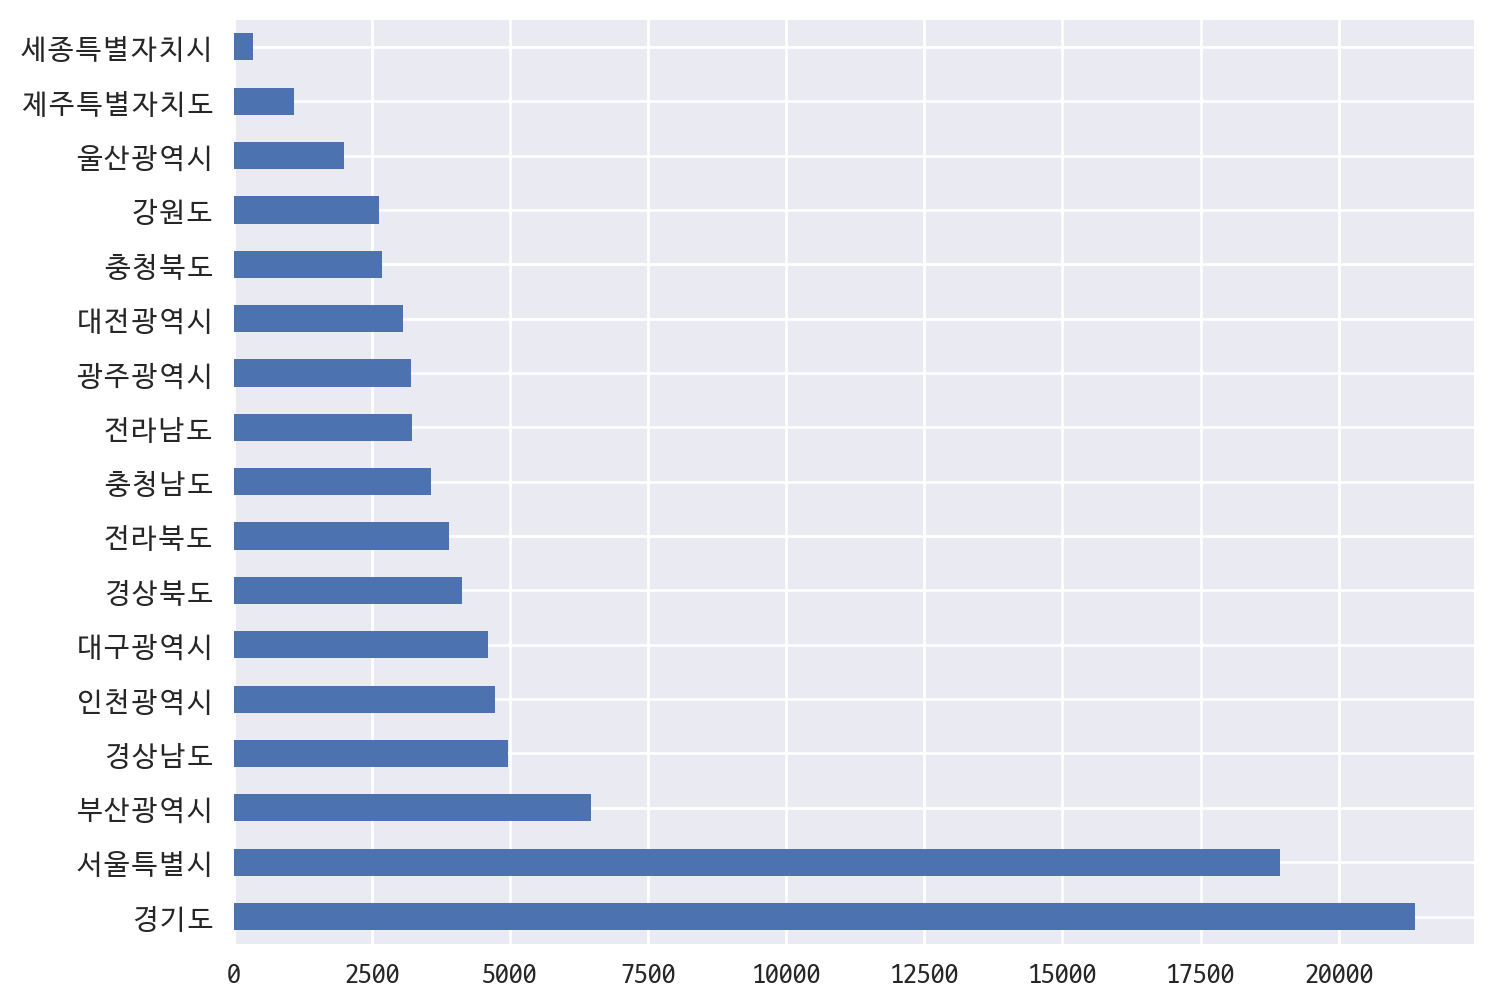

In [59]:
# Pandas 에는 plot기능을 내장하고 있습니다. 
# 위에서 분석한 시도명 수를 막대그래프로 표현해 봅니다.
df["시도명"].value_counts().plot.barh(figsize=(8, 6))


<Axes: ylabel='시도명'>

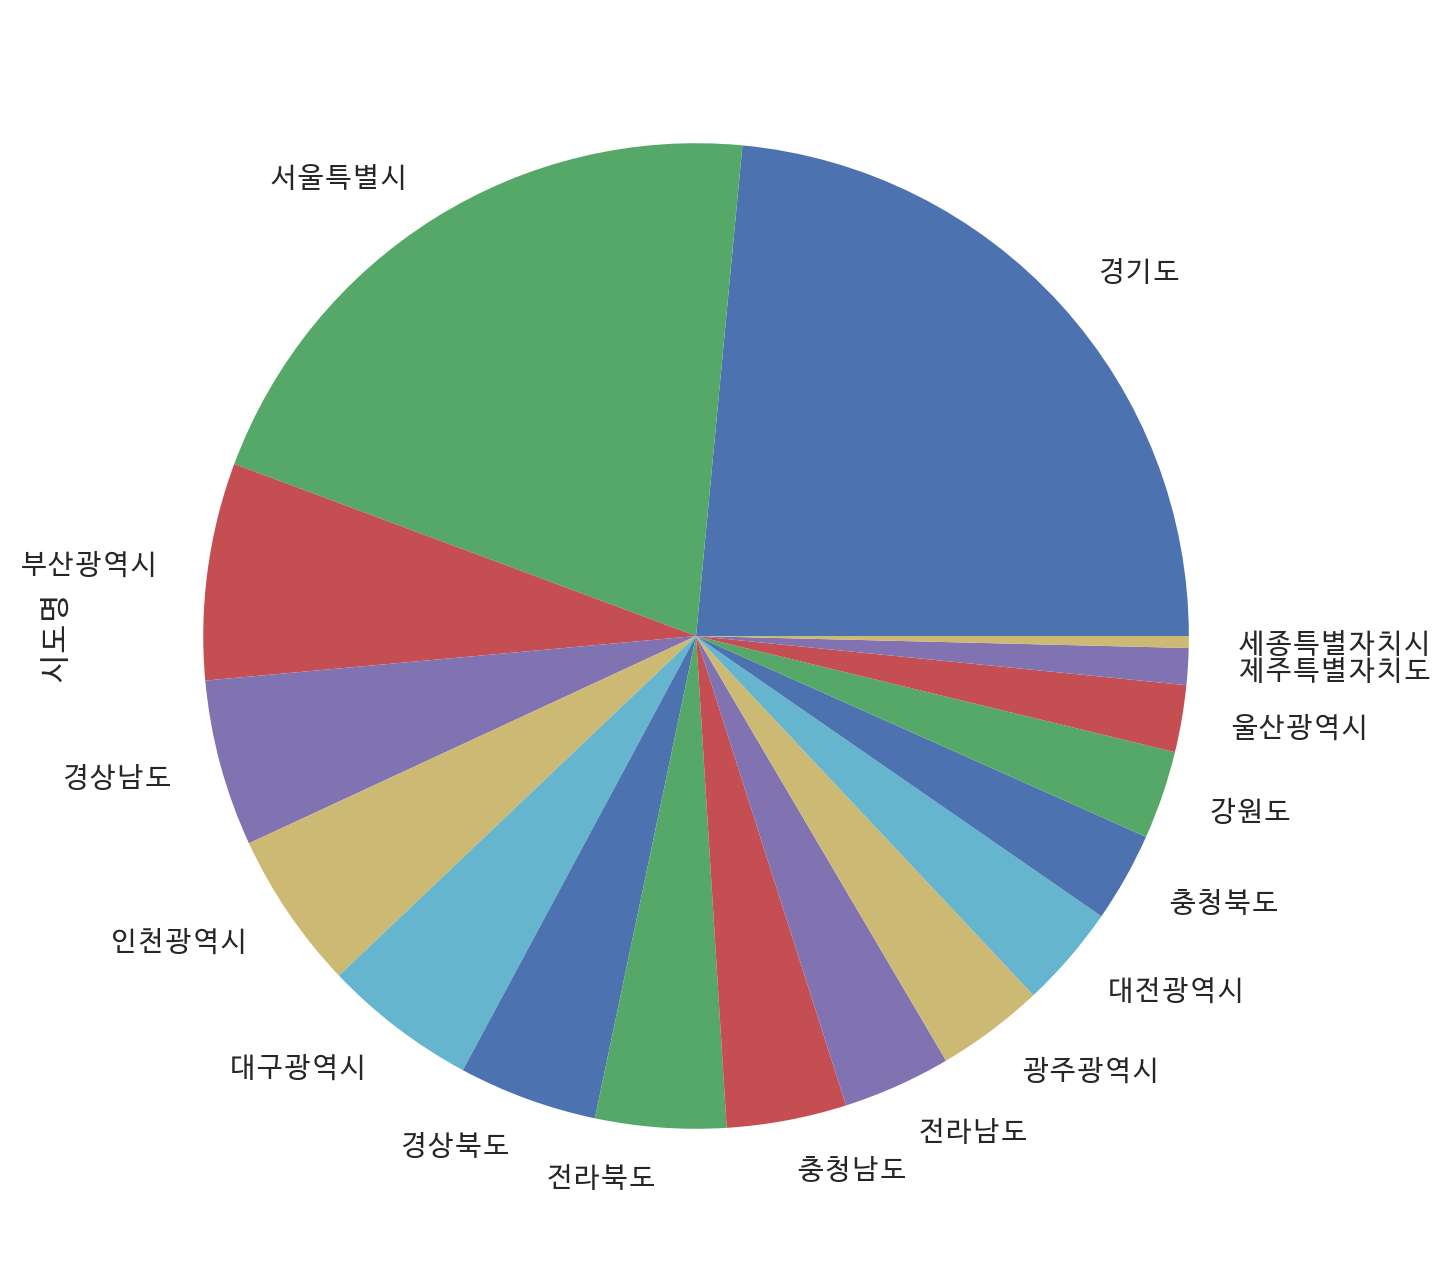

In [60]:
# 판다스의 plot.pie()를 사용해서 파이그래프를 그려봅니다.
df["시도명"].value_counts().plot.pie(figsize=(10, 8))

<Axes: xlabel='count', ylabel='시도명'>

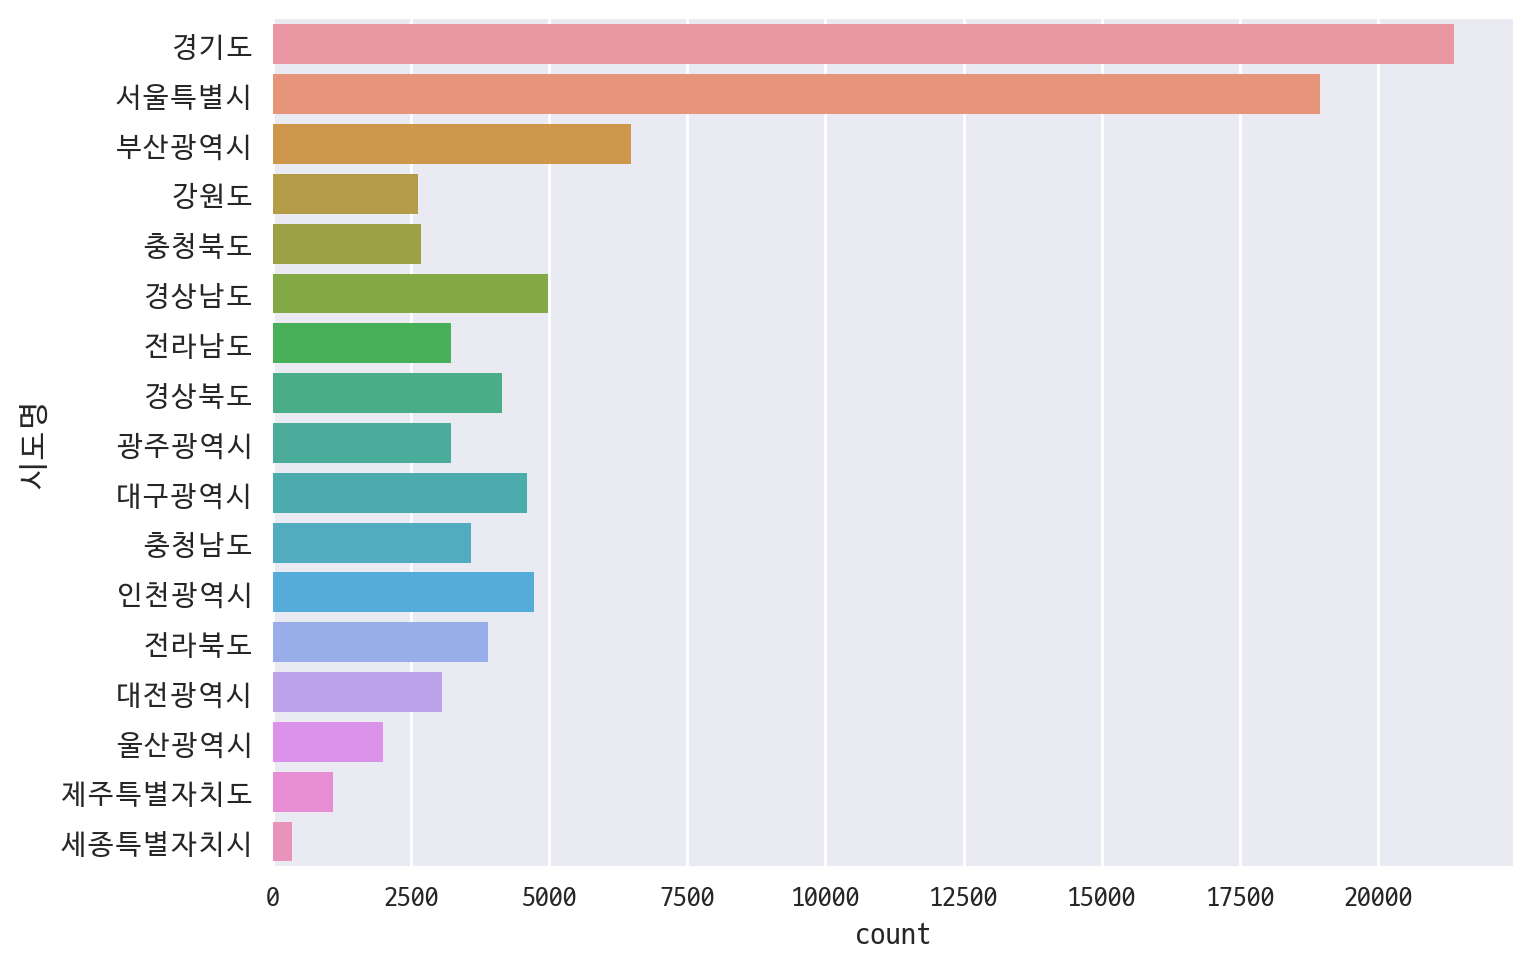

In [61]:
sns.countplot(df, y="시도명")

In [50]:
# "상권업종대분류명"으로 갯수를 세어봅니다.
df["상권업종대분류명"].value_counts()


의료    91335
Name: 상권업종대분류명, dtype: int64

In [62]:
# "상권업종중분류명"으로 갯수를 세어봅니다.
df["상권업종중분류명"].value_counts()


병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [65]:
# normalize=True 를 사용해 비율을 구해봅니다.
df["상권업종중분류명"].value_counts(normalize=True)

병원          0.665397
약국/한약방      0.229080
수의업         0.058280
유사의료업       0.041320
의료관련서비스업    0.005923
Name: 상권업종중분류명, dtype: float64

<Axes: >

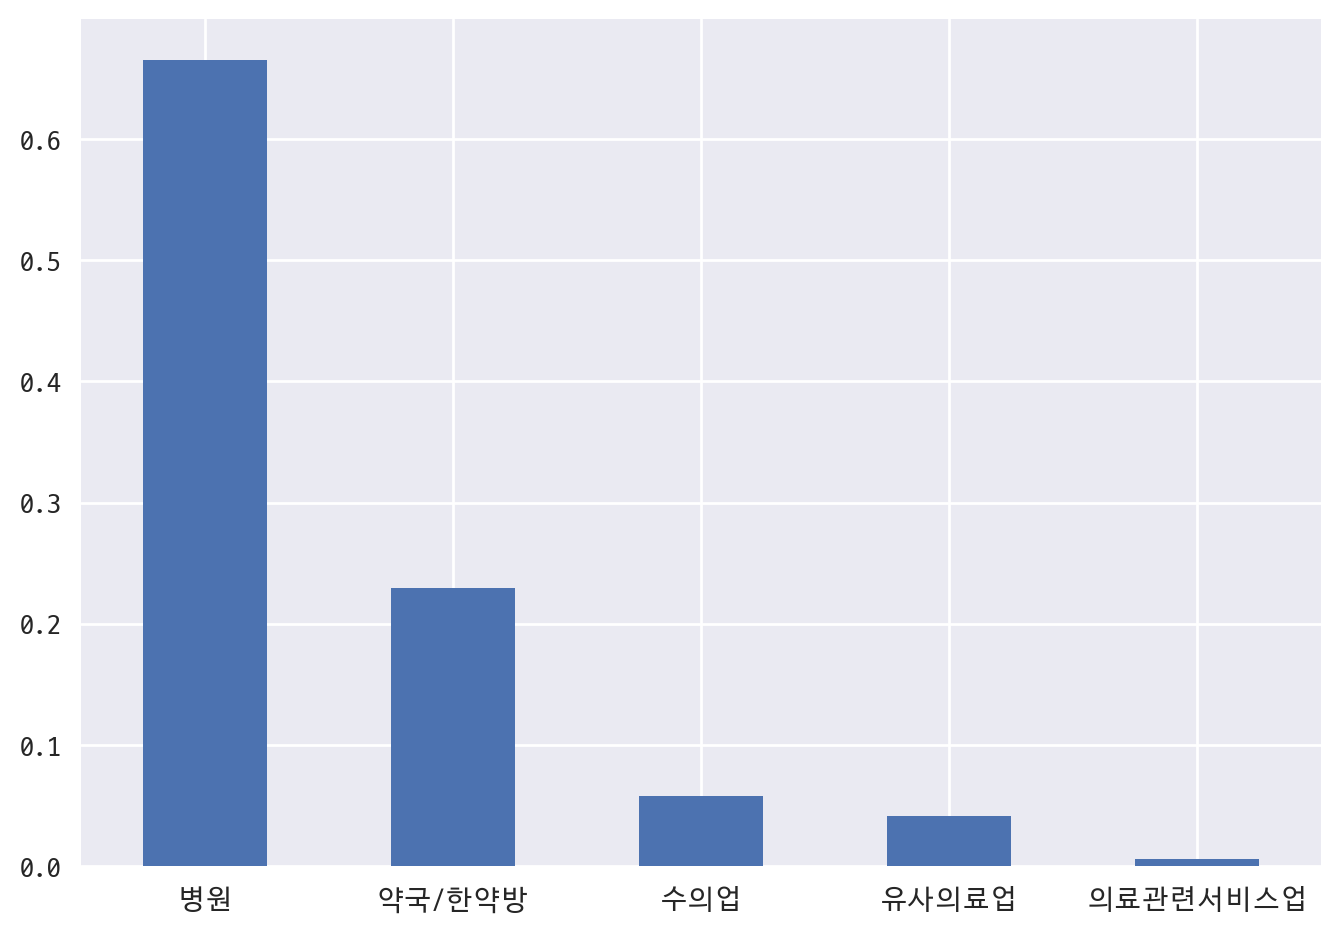

In [67]:
# 판다스의 plot.bar()를 사용해서 막대그래프를 그려봅니다. 
df["상권업종중분류명"].value_counts(normalize=True).plot.bar(rot=0)

<Axes: ylabel='상권업종중분류명'>

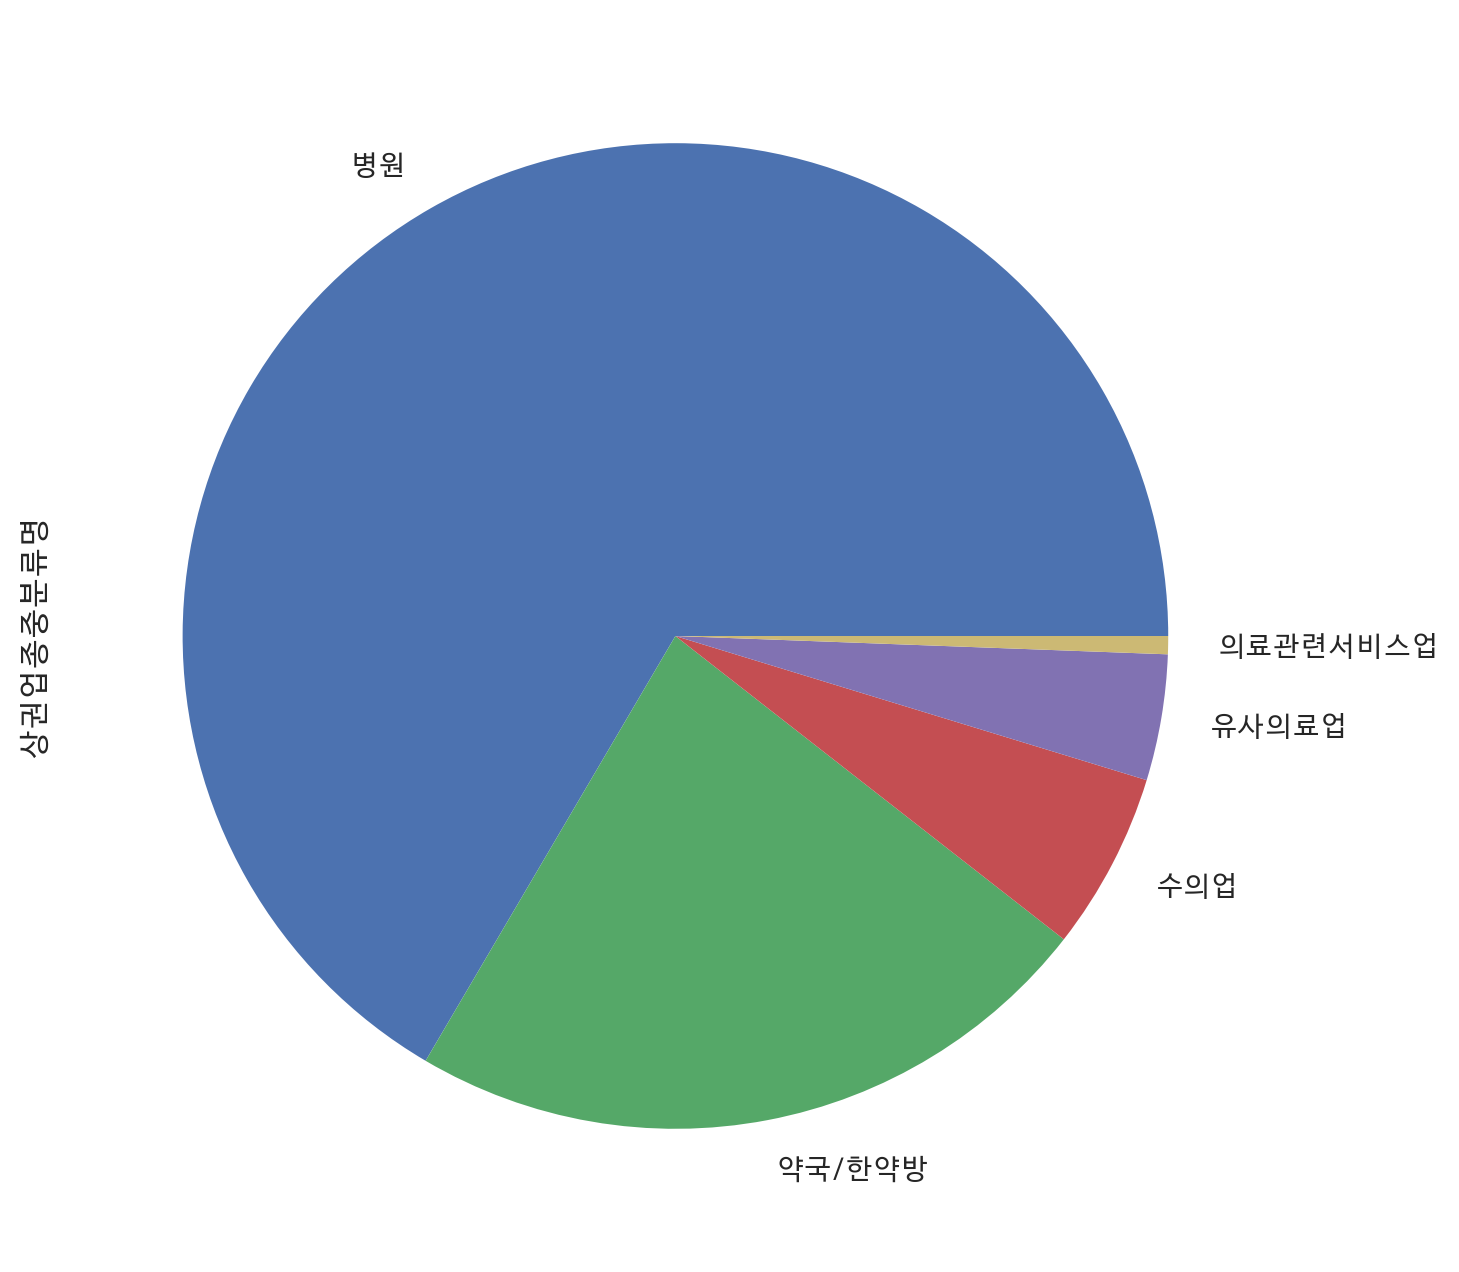

In [69]:
# 판다스의 plot.pie()를 사용해서 파이그래프를 그려봅니다.
df["상권업종중분류명"].value_counts(normalize=True).plot.pie(figsize=(10, 8))

In [70]:
# "상권업종소분류명" 에 대한 그룹화 된 값을 카운트 합니다.
df["상권업종소분류명"].value_counts()

약국         18964
치과의원       13731
한의원        13211
내과/외과      11374
기타병원        4922
일반병원        3385
동물병원        3098
정형/성형외과     2562
소아과         2472
수의업-종합      2216
치과기공소       1724
이비인후과의원     1486
한약방         1442
피부과         1273
산부인과        1116
노인/치매병원     1055
안과의원        1042
비뇨기과         809
종합병원         762
치과병원         756
언어치료         664
유사의료업기타      629
탕제원          517
산후조리원        511
신경외과         421
한방병원         397
척추교정치료       338
침구원          154
혈액원          130
응급구조대        125
조산원           30
접골원            9
수의업-기타         9
제대혈            1
Name: 상권업종소분류명, dtype: int64

<Axes: >

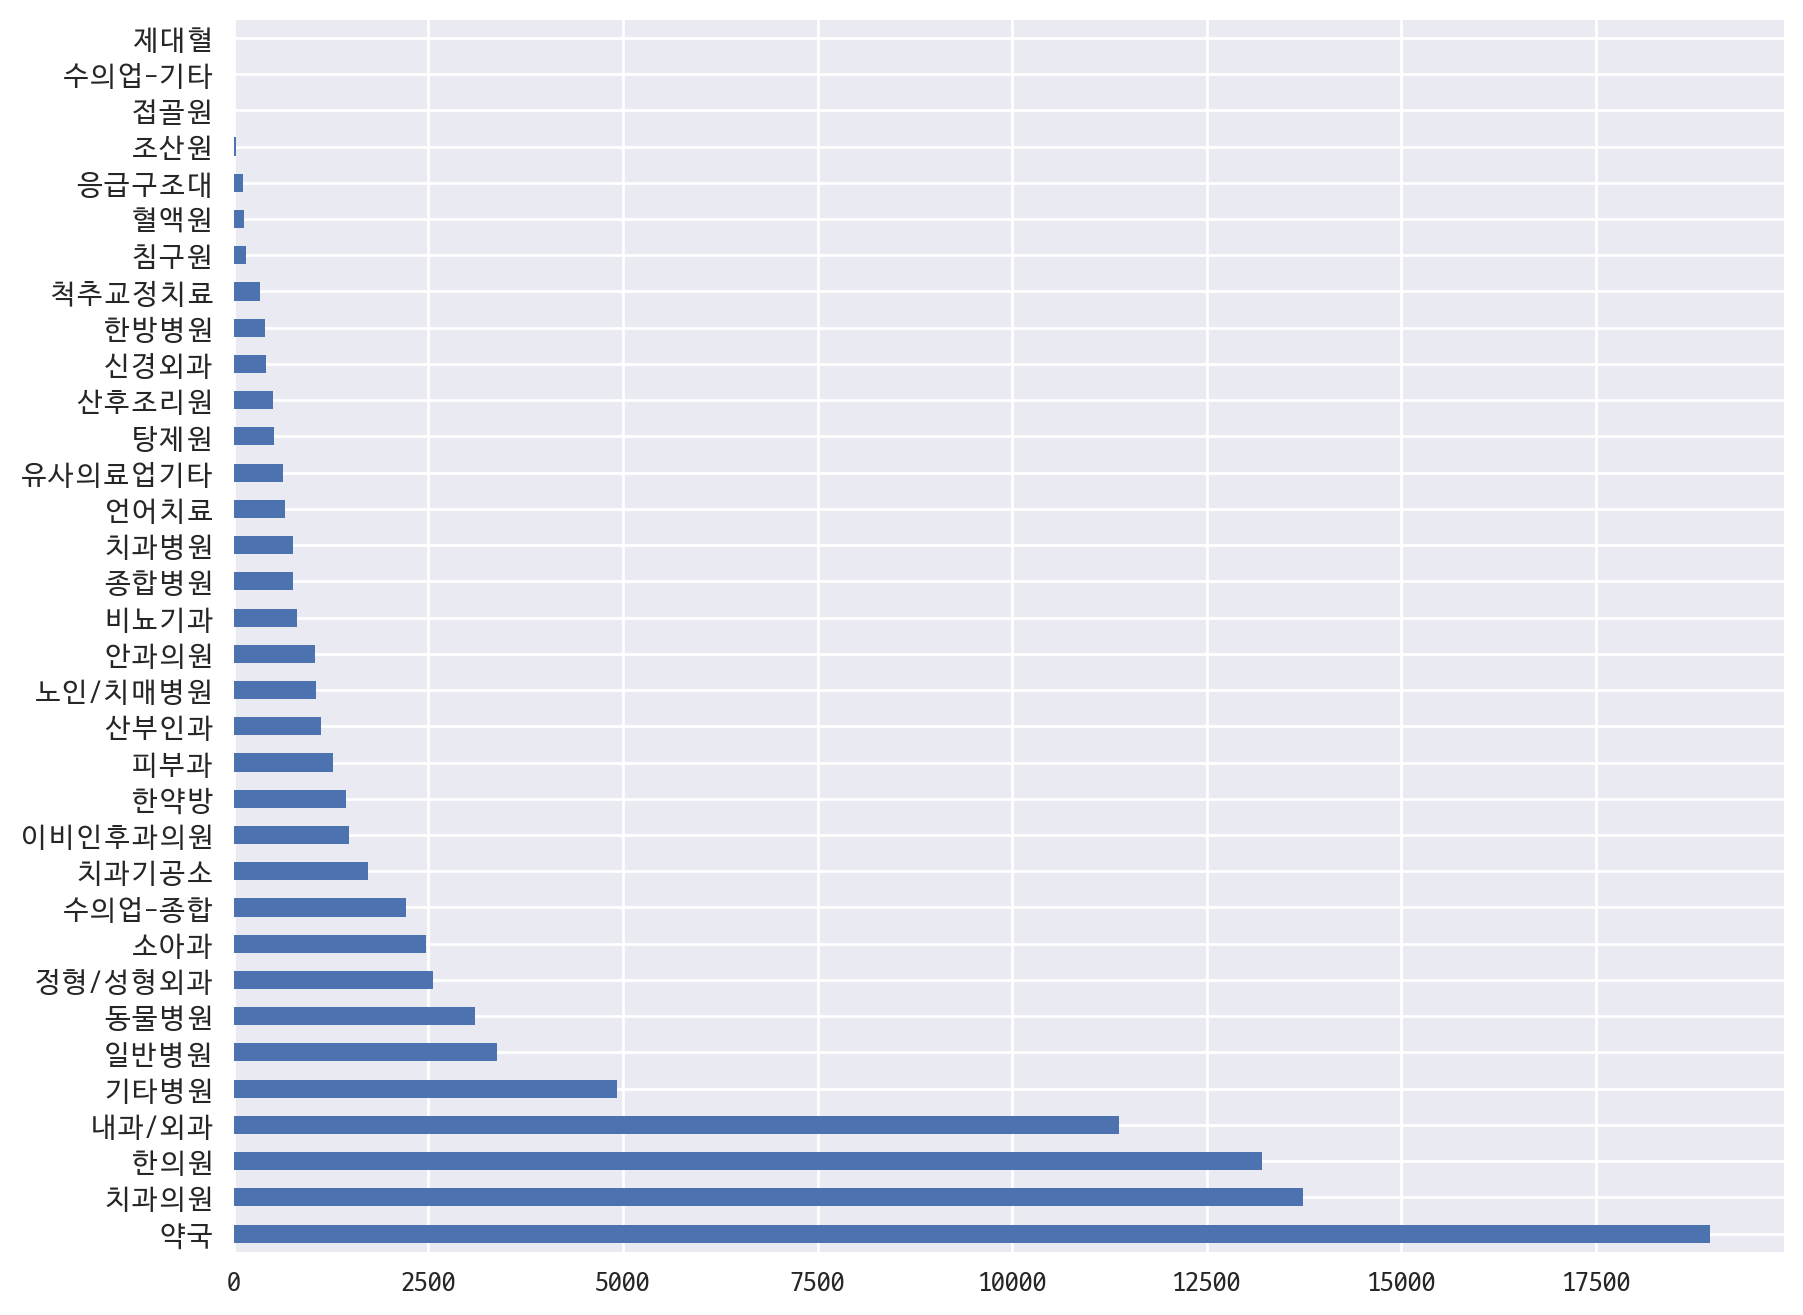

In [73]:
# "상권업종소분류명"으로 갯수를 세어봅니다.
# 판다스의 plot.bar()를 사용해서 막대그래프를 그려봅니다. 
df["상권업종소분류명"].value_counts().plot.barh(figsize=(10, 8))

## 데이터 색인하기
* 특정 데이터만 모아서 따로 봅니다.

In [92]:
# "상권업종중분류명"이 "약국/한약방"인 데이터만 가져와서 
# df_medical 이라는 변수에 담아봅니다.
# 그리고 head()를 통해 미리보기를 합니다.
df_medical = df[df["상권업종중분류명"] == "약국/한약방"]
df_medical.head()

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
4,20364049,더블유스토어수지점,S,의료,S02,약국/한약방,S02A01,약국,41.0,경기도,...,경기도 용인시 수지구 풍덕천동 712-2,414653205024,경기도 용인시 수지구 문정로,32,4146510100107120002026238,경기도 용인시 수지구 문정로 32,448170.0,16837.0,127.095522,37.323528
6,20733252,춘산한약방,S,의료,S02,약국/한약방,S02A02,한약방,42.0,강원도,...,강원도 춘천시 중앙로2가 99,421104454113,강원도 춘천시 낙원길,50,4211010500101000000023668,강원도 춘천시 낙원길 50,200042.0,24273.0,127.726905,37.880504
7,20582210,부부탕제원,S,의료,S02,약국/한약방,S02A03,탕제원,43.0,충청북도,...,충청북도 청주시 상당구 금천동 187-17,431114508623,충청북도 청주시 상당구 중고개로337번길,134,4311112000101870017042942,충청북도 청주시 상당구 중고개로337번길 134,360802.0,28726.0,127.499206,36.625355
10,21057519,민생약국,S,의료,S02,약국/한약방,S02A01,약국,48.0,경상남도,...,경상남도 합천군 용주면 월평리 78-2,488904844473,경상남도 합천군 용주면 월평길,149,4889046030200780002048274,경상남도 합천군 용주면 월평길 149-35,678912.0,50212.0,128.118615,35.575962
13,21217689,제중당한약방,S,의료,S02,약국/한약방,S02A02,한약방,46.0,전라남도,...,전라남도 영암군 도포면 덕화리 296,468304685396,전라남도 영암군 도포면 인덕길,75,4683035023102960000000001,전라남도 영암군 도포면 인덕길 75-10,526832.0,58429.0,126.630348,34.834080


In [97]:
# "상권업종대분류명" 에서 "의료"만 가져옵니다.
# df.loc를 사용하면 행,열을 함께 가져올 수 있습니다.
# 이 기능을 통해 "상권업종중분류명" 만 가져옵니다. 
# 그리고 가져온 결과를 value_counts 를 통해 중분류의 갯수를 세어봅니다.
# shop_type
shop_type = df["상권업종대분류명"] == "의료"
df.loc[shop_type, "상권업종중분류명"].value_counts()

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [98]:
# 위와 똑같은 기능을 수행하는 코드입니다. 아래와 같이 한 줄에 표현할 수도 있습니다. 
# df.loc[df["상권업종대분류명"] == "의료", "상권업종중분류명"].value_counts()
df.loc[df["상권업종대분류명"] == "의료", "상권업종중분류명"].value_counts()

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [106]:
# 유사의료업만 따로 모아봅니다.
# df.loc[df["상권업종중분류명"] == "유사의료업", "상권업종소분류명"].value_counts()
df_medi = df[df["상권업종중분류명"] == "유사의료업"]
df_medi.shape


(3774, 30)

In [108]:
# 상호명을 그룹화해서 갯수를 세어봅니다.
# value_counts 를 사용해서 상위 10개를 출력합니다.
# df.columns
df["상호명"].value_counts().head(10)

리원       152
온누리약국    149
경희한의원    141
우리약국     119
중앙약국     111
전자담배      98
조은약국      95
건강약국      87
제일약국      79
사랑약국      73
Name: 상호명, dtype: int64

In [117]:
# df.loc[df["상호명"] == "리원", "상권업종소분류명"]

89339      산후조리원
89430    유사의료업기타
89432      산후조리원
89434      산후조리원
89506      산후조리원
          ...   
91292      산후조리원
91303      산후조리원
91309      산후조리원
91329      산후조리원
91331      산후조리원
Name: 상권업종소분류명, Length: 152, dtype: object

In [111]:
# 유사의료업만 df_medi 변수에 담겨져 있습니다.
# df_medi 변수에서 상호명으로 갯수를 세어봅니다. 
# 가장 많은 상호 상위 10개를 출력해 봅니다.
df_medi["상호명"].value_counts().head(10)


리원          32
고려수지침       22
대한적십자사      17
헌혈의집        12
고려수지침학회     10
수치과기공소      10
제일치과기공소      9
미소치과기공소      8
아트치과기공소      8
이사랑치과기공소     8
Name: 상호명, dtype: int64

### 여러 조건으로 색인하기

In [ ]:
# "상권업종소분류명"이 "약국" 인 것과
# "시도명" 이 "서울특별시"인 데이터만 가져옵니다.
# df_seoul_drug

### 구별로 보기

In [ ]:
# 위에서 색인한 데이터로 "시군구명"으로 그룹화 해서 갯수를 세어봅니다.
# 구별로 약국이 몇개가 있는지 확인해 봅니다.


In [ ]:
# normalize=True 를 통해 비율을 구해봅니다.


In [ ]:
# 위에서 구한 결과를 판다스의 plot.bar()를 활용해 막대그래프로 그립니다.


In [ ]:
# "상권업종소분류명"이 "종합병원" 인 것과
# "시도명" 이 "서울특별시"인 데이터만 가져옵니다.
# df_seoul_hospital

In [ ]:
# "시군구명" 으로 그룹화 해서 구별로 종합병원의 수를 세어봅니다.


### 텍스트 데이터 색인하기

In [ ]:
# str.contains 를 사용해서 "상호명"에 "대학병원"이 들어가는 것을 가져와서 head()로 미리보기 합니다.


In [ ]:
# str.startswith 를 사용해 "서울"로 시작하는 도로명주소를 가져와서 head()로 미리보기 합니다.


In [ ]:
# str.endswith를 사용해서 "상호명"이 "병원"으로 끝나는 데이터를 가져와서 head()로 미리보기 합니다.


### 특정 지역만 보기

In [ ]:
# 서울에 있는 데이터의 위도와 경도를 봅니다.
# 결과를 df_seoul 이라는 데이터프레임에 저장합니다.
# 새로운 변수에 데이터프레임을 저장시 copy()를 사용합니다.
# df_seoul


In [ ]:
# seaborn 의 countplot 을 사용해서 위에서 만든 df_seoul 데이터프레임의
# 시군구명을 시각화 합니다.
plt.figure(figsize=(9, 6))


In [ ]:
# Pandas 의 plot.scatter 를 통해 경도와 위도를 표시해 봅니다.


In [ ]:
# seaborn의 scatterplot 을 통해 구별 경도와 위도를 표시해 봅니다.
plt.figure(figsize=(16, 12))


In [ ]:
# seaborn의 scatterplot 을 통해 "상권업종중분류명" 경도와 위도를 표시해 봅니다.
plt.figure(figsize=(16, 12))


In [ ]:
# seaborn의 scatterplot 을 통해 전국 데이터(df)로 구별 경도와 위도를 표시해 봅니다.
plt.figure(figsize=(16, 12))



## Folium 으로 지도 활용하기
* 다음의 프롬프트 창을 열어 conda 명령어로 설치합니다.
<img src="https://t1.daumcdn.net/cfile/tistory/99576B4A5B751DC902">

검은색 프롬프트 창에 아래 명령어를 통해 folium 을 설치합니다.


`conda install -c conda-forge folium`

### Folium 사용예제
http://nbviewer.jupyter.org/github/python-visualization/folium/tree/main/examples/


In [ ]:
# 아나콘다에서 folium 을 사용하기 위해서는 별도의 설치가 필요
# https://anaconda.org/conda-forge/folium
# conda install -c conda-forge folium 
# 지도 시각화를 위한 라이브러리


In [ ]:
# geo_df 에 df_seoul_hospital 을 copy() 로 복사해서 할당합니다.


In [ ]:
# 지도의 중심을 지정하기 위해 위도와 경도의 평균을 구합니다. 


## 좀 더 분석해 보기
* 상권업종중분류명, 상권업종소분류명 중에 관심 있는 분류명을 색인 후에 시도별, 시군구별 분석을 해보세요.
* 예시) 
    * 언어치료는 시군구별로 어디에 많이 위치할까?
    * 의료시설은 서울과 강남에 집중되어 있을까?
    * 강남에는 피부과, 성형외과가 다른 지역에 비해 많을까?